At PyCon in Montreal https://us.pycon.org/2015/ Chris Waigl gave a talk about satellite mapping and some of the python tools that help with this

Following the talk I decided to take a look to see what satellite data is available around the time of the hurricanes Fay and Gonzalo, back in October 2014.

The hope was to be able to find suitable before and after images at a high enough resolution to use image processing software to help with damage analyis.

Chris's talk is on youtube (along with all the other PyCon talks) and embedded below.

In [2]:
from IPython import display

# Chris Waigl, Satellite mapping for everyone.
display.YouTubeVideo('MCHpt1FvblI')

### TRMM

A little googling turned up this gem from the NASA's Tropical Rainfall Measuring Mission.

<img src='http://www.nasa.gov/sites/default/files/thumbnails/image/fay_and_gonzalo_rain_10-20_october_2014_animated.gif'>


**Image Credit: NASA/SSAI, Hal Pierce**  

<a href=http://www.nasa.gov/content/goddard/nasas-trmm-satellite-calculates-hurricanes-fay-and-gonzalo-rainfall/>Full article</a>

This is a seven day animation, covering the period of Fay and Gonzalo.

Assuming rainfall is a good proxy for storm intensity, you can see how Fay intensified as it reached the island and how Gonzalo followed a very similar path, just six days later.

The key question with respect to Bermuda is whether this sort of data is available at higher resolution.

The article does mention that 

<a href="http://www.nasa.gov/mission_pages/GPM/main/index.html">Global Precipitation Measurement (GPM) mission product in late 2014</a> will supersede the TRMM project.

The <a href="http://www.nasa.gov/mission_pages/GPM/main/index.html">Nasa GPM page has some wonderful animations of the sort of thing that is possible with GPM.


In [6]:
# 3-D animation of a typhoon from the GPM project
display.YouTubeVideo('kDlTZxejlbI')

### Landsat data for Bermuda

A major challenge with satellite data is finding just what images are available. 

Landsat has <a href="http://landsat.usgs.gov/Landsat_Search_and_Download.php">
a well documented site created by the USGS</a>

However it is still time consuming to see what is available.

Downloads can be large, roughly 1GB per satellite image.  These images generally contain multiple layers for different parts of the spectrum.

To download the larger files you need to register and get an API key.

Once registered I downloaded a couple of images, either side of the October storms.

Below are my attempts to extract and plot the data.

In [8]:
# lets start with matplotlib
%matplotlib inline
from matplotlib import pyplot

In [9]:
# Chris recommended the rasterio library

import rasterio

In [10]:
infile = '../data/LC80060382014275LGN00_B2.TIF'

In [11]:
# This is pretty simple, just open the TIFF file and you have
# an object that can tell you all sorts of things about the image

data = rasterio.open(infile)
data.width, data.height

(7771, 7911)

In [12]:
# take a look at the meta data
data.meta

{'affine': Affine(30.0, 0.0, 192885.0,
       0.0, -30.0, 3631815.0),
 'blockxsize': 7771,
 'blockysize': 1,
 'count': 1,
 'crs': {'init': 'epsg:32620'},
 'driver': 'GTiff',
 'dtype': 'uint16',
 'height': 7911,
 'nodata': None,
 'tiled': False,
 'transform': (192885.0, 30.0, 0.0, 3631815.0, 0.0, -30.0),
 'width': 7771}

In [31]:
# read the bands in the file, there will be as many bands as
# the count above
bands = data.read()

In [32]:
# take a look at the data -- numpy arrays with 16 bit values

bands

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

In [33]:
# so we have a 3D array, first dimension is the band
bands[0].shape

(7911, 7771)

In [35]:
img = bands[0]

# just take every 10th pixel for now -- imshow does not handle
large images well.
img = img[::10, ::10]

img.shape

(792, 778)

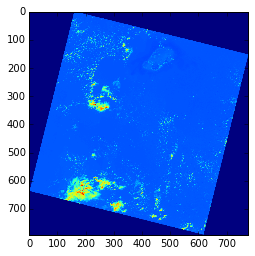

In [27]:
# now plot the thing.
pyplot.imshow(img)

In [16]:
pyplot.subplot?

### Summary

So we have succeeded in downloading and plotting one of these bands.

Now time to play spot Bermuda.   First impressions are this particular data is likely not high enough resolution to be useful.

A second thing to note is that the NASA sites are, understandably, quite US-centric.  To do comprehensive studies of satellite data for Bermuda it looks like it will be worthwhile to create local mirrors of the key data.

In particular, whilst some of these images are quite large, the part covering Bermuda will generally be much more manageable.


### Zooming in on Bermuda

In [68]:
# put it all together

def plot_image(infile, box=None, axes=None):
    
    if axes is None:
        fig, axes = pyplot.subplots(1, 2, figsize=(8,8))
        
    
    if box is None:
        box = 1000, 2200, 3700, 5500
    
    a, b, c, d = box
    data = rasterio.open(infile)
    bands = data.read()
    img = bands[0]
    img = img[a:b, c:d]
    
    axes.imshow(img)

Figure(640x640)


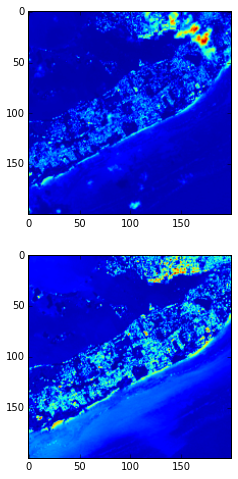

In [86]:
# plotting images either side of the hurricane

fig, axes = pyplot.subplots(2, 1, figsize=(8,8))

print(fig)
print(axes)


#pyplot.subplot(1,2,1)
infile = '../data/LC80060382014275LGN00_B%d.TIF' % x
plot_image(infile, box=(1900, 2100, 4500, 4700), axes=axes[0])

#pyplot.subplot(1,2,2)
infile = '../data/LC80060382014307LGN00_B%d.TIF' % x
plot_image(infile, box=(1900, 2100, 4500, 4700), axes=axes[1])